<a href="https://colab.research.google.com/github/pawan-cpu/Learn-Python-with-Pawan-Kumar/blob/main/Copy_of_2021_12_31_pawan_lesson41.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Lesson 41: Pie Chart & Bell Curve

---

### Teacher-Student Tasks

In this class, we will learn to create pie charts and bell curves.

Let's quickly run the codes covered in the previous classes and begin this session from **Task 1: Pie Charts**

---

### Recap

In [ ]:
# Run the code cell.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Loading the dataset.
csv_file = 'https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/whitehat-ds-datasets/air-quality/AirQualityUCI.csv'
df = pd.read_csv(csv_file, sep=';')

# Dropping the 'Unnamed: 15' & 'Unnamed: 16' columns.
df = df.drop(columns=['Unnamed: 15', 'Unnamed: 16'], axis=1) 

# Dropping the null values.
df = df.dropna()

# Creating a Pandas series containing 'datetime' objects.
dt_series = pd.Series(data = [item.split("/")[2] + "-" + item.split("/")[1] + "-" + item.split("/")[0] for item in df['Date']], index=df.index) + ' ' + pd.Series(data=[str(item).replace(".", ":") for item in df['Time']], index=df.index)
dt_series = pd.to_datetime(dt_series)

# Remove the Date & Time columns from the DataFrame and insert the 'dt_series' in it.
df = df.drop(columns=['Date', 'Time'], axis=1)
df.insert(loc=0, column='DateTime', value=dt_series)

# Get the Pandas series containing the year values as integers.
year_series = dt_series.dt.year

# Get the Pandas series containing the month values as integers.
month_series = dt_series.dt.month

# Get the Pandas series containing the day values as integers.
day_series = dt_series.dt.day

# Get the Pandas series containing the days of a week, i.e., Monday, Tuesday, Wednesday etc.
day_name_series = dt_series.dt.day_name()

# Add the 'Year', 'Month', 'Day' and 'Day Name' columns to the DataFrame.
df['Year'] = year_series
df['Month'] = month_series
df['Day'] = day_series
df['Day Name'] = day_name_series

# Sort the DataFrame by the 'DateTime' values in the ascending order. Also, display the first 10 rows of the DataFrame.
df = df.sort_values(by='DateTime')

# Create a function to replace the commas with periods in a Pandas series.
def comma_to_period(series):
    new_series = pd.Series(data=[float(str(item).replace(',', '.')) for item in series], index=df.index)
    return new_series

# Apply the 'comma_to_period()' function on the ''CO(GT)', 'C6H6(GT)', 'T', 'RH' and 'AH' columns.
cols_to_correct = ['CO(GT)', 'C6H6(GT)', 'T', 'RH', 'AH'] # Create a list of column names.
for col in cols_to_correct: # Iterate through each column
    df[col] = comma_to_period(df[col]) # Replace the original column with the new series.

# Remove all the columns from the 'df' DataFrame containing more than 10% garbage value.
df = df.drop(columns=['NMHC(GT)', 'CO(GT)', 'NOx(GT)', 'NO2(GT)'], axis=1)

# Create a new DataFrame containing records for the years 2004 and 2005.
aq_2004_df = df[df['Year'] == 2004]
aq_2005_df = df[df['Year'] == 2005]

# Replace the -200 value with the median values for each column having indices between 1 and -4 (excluding -4) for the 2004 year DataFrame.
for col in aq_2004_df.columns[1:-4]:
  median = aq_2004_df.loc[aq_2004_df[col] != -200, col].median()
  aq_2004_df[col] = aq_2004_df[col].replace(to_replace=-200, value=median)

# Repeat the same exercise for the 2005 year DataFrame.
for col in aq_2005_df.columns[1:-4]:
  median = aq_2005_df.loc[aq_2005_df[col] != -200, col].median()
  aq_2005_df[col] = aq_2005_df[col].replace(to_replace=-200, value=median)

# Group the DataFrames about the 'Month' column.
group_2004_month = aq_2004_df.groupby(by='Month')
group_2005_month = aq_2005_df.groupby(by='Month')

# Concatenate the two DataFrames for 2004 and 2005 to obtain one DataFrame.
df = pd.concat([aq_2004_df, aq_2005_df])

# Information of the DataFrame.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9357 entries, 0 to 9356
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   DateTime       9357 non-null   datetime64[ns]
 1   PT08.S1(CO)    9357 non-null   float64       
 2   C6H6(GT)       9357 non-null   float64       
 3   PT08.S2(NMHC)  9357 non-null   float64       
 4   PT08.S3(NOx)   9357 non-null   float64       
 5   PT08.S4(NO2)   9357 non-null   float64       
 6   PT08.S5(O3)    9357 non-null   float64       
 7   T              9357 non-null   float64       
 8   RH             9357 non-null   float64       
 9   AH             9357 non-null   float64       
 10  Year           9357 non-null   int64         
 11  Month          9357 non-null   int64         
 12  Day            9357 non-null   int64         
 13  Day Name       9357 non-null   object        
dtypes: datetime64[ns](1), float64(9), int64(3), object(1)
memory usage: 1.1+

The description for all the columns containing data for air pollutants, temperature, relative humidity and absolute humidity is provided below.


|Columns|Description|
|-|-|
|PT08.S1(CO)|PT08.S1 (tin oxide) hourly averaged sensor response (nominally $\text{CO}$ targeted)|
|C6H6(GT)|True hourly averaged Benzene concentration in $\frac{\mu g}{m^3}$|
|PT08.S2(NMHC)|PT08.S2 (titania) hourly averaged sensor response (nominally $\text{NMHC}$ targeted)|
|PT08.S3(NOx)|PT08.S3 (tungsten oxide) hourly averaged sensor response (nominally $\text{NO}_x$ targeted)|
|PT08.S4(NO2)|PT08.S4 (tungsten oxide) hourly averaged sensor response (nominally $\text{NO}_2$ targeted)|
|PT08.S5(O3) |PT08.S5 (indium oxide) hourly averaged sensor response (nominally $\text{O}_3$ targeted)|
|T|Temperature in Â°C|
|RH|Relative Humidity (%)|
|AH|AH Absolute Humidity|

---

#### Task 1: Pie Charts

A pie chart displays the various proportions of data in a dataset through a circular representation wherein each proportion is represented through a slice.
Larger the slice, the larger the proportion.

<center><img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/pie_chart_eg.webp'></center>

E.g., we can visualize the percentages of observations recorded in 2004 and 2005 using a pie chart.

To create a pie chart first you need to define the slice proportions through a list, a tuple, a series, or an array and pass it as an input to the `pie()` function.

**Syntax of `pie()` function:** `plt.pie(slice_proportions_array)`

The slice proportions can either be the total number of values or the total percentage of values. Either way, the `pie()` function returns a pie chart such that each slice represents the percentage of values.

You can use the `dpi` attribute to control the quality of the charts/plots created using the `matplotlib` and `seaborn` modules. The term **dpi** stands for **dots per inch**.

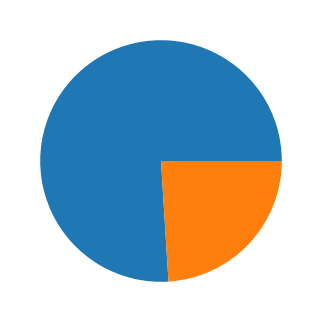

In [ ]:
# S1.1: Create a pie chart to display the percentage of data collected in 2004 and 2005.
data=df['Year'].value_counts()*100/df.shape[0]
plt.figure(dpi=100)
plt.pie(data)
plt.show()

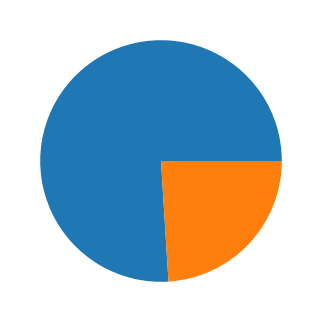

In [ ]:
# S1.2: Create a pie chart to display the percentage of data collected in 2004 and 2005 without calculating the percentage values for slices.
data=df['Year'].value_counts()
plt.figure(dpi=100)
plt.pie(data)
plt.show()

Let's label the slices in the pie chart to identify the slices for 2004 and 2005. For this, you need to pass a list, a tuple, a series or an array as an input to the `labels` parameter inside the `pie()` function.

Additionally, you can pass the `{'edgecolor':'red'}` dictionary as an input to the `wedgeprops` parameter inside the `pie()` function to define the colour of the outline of a pie chart.

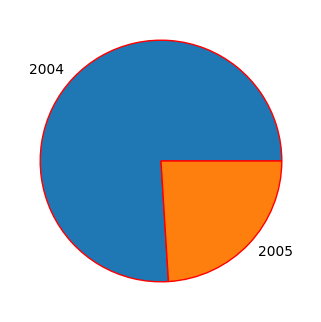

In [ ]:
# S1.3: Label the slices of a pie chart with their corresponding year values. Also, set 'red' as the outline colour of the chart.
data=df['Year'].value_counts()
label=[2004,2005]
plt.figure(dpi=100)
plt.pie(data,labels=label,wedgeprops={'edgecolor':'red'})
plt.show()

You can add the percentage values in the corresponding slices by passing `autopct='%1.1f%%'` as another parameter to the `pie()` function. If you change the numeral after the dot (or period) to `2`, then the pie chart will display the percentage value upto 2 places after the decimal.

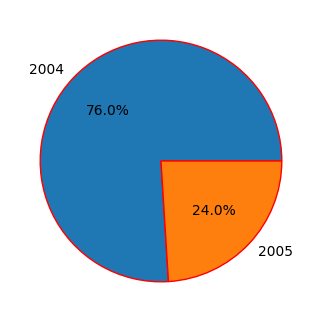

In [ ]:
# S1.4 Add percentage values to the corresponding slices.
data=df['Year'].value_counts()
label=[2004,2005]
plt.figure(dpi=100)
plt.pie(data,labels=label,wedgeprops={'edgecolor':'red'},autopct='%1.1f%%')
plt.show()

You can separate a slice (or more slices) from a pie by passing another parameter called `explode` to the `pie()` function. The input to the `explode` parameter should be a list, tuple etc. containing the amount by which a slice should move away from the centre of a pie.

E.g., let's move the slice for the 2005 year away from the centre of the pie by a distance of 15% of the radius of the pie. For this, we will have to create a list, tuple etc. containing the first value as `0` (corresponding to the distance the slice for 2004 should move) and the second value as `0.15` denoting that the slice for the 2005 year should move away from the centre of the pie by a distance of 15% of the radius of the pie.

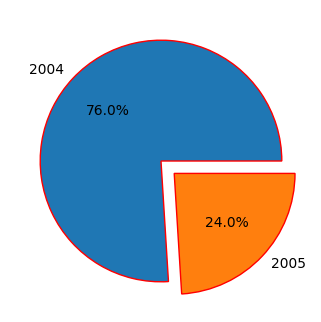

In [ ]:
# S1.5: Separate the slice for the year 2005.
explode=[0,0.15]
data=df['Year'].value_counts()
label=[2004,2005]
plt.figure(dpi=100)
plt.pie(data,labels=label,wedgeprops={'edgecolor':'red'},autopct='%1.1f%%',explode=explode)
plt.show()

You can also provide the 3D effect to the pie by adding the `shadow=True` parameter to the `pie()` function.

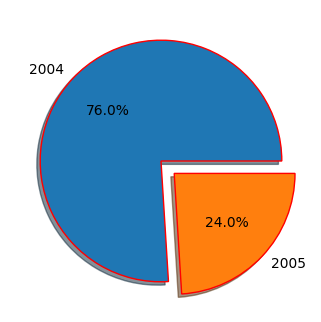

In [ ]:
# S1.6: Add 3D effect to the pie.
explode=[0,0.15]
data=df['Year'].value_counts()
label=[2004,2005]
plt.figure(dpi=100)
plt.pie(data,labels=label,wedgeprops={'edgecolor':'red'},autopct='%1.1f%%',explode=explode,shadow=True)
plt.show()

Similarly, you can create a pie chart to visualise the proportion of the observations recorded in various months in the year 2005. For this, we may require to add another column to the `df` DataFrame containing the month names for each record.

To get a series containing the month names from a series containing the `datetime` object, you can use the `series.dt.month_name()` function.

In [ ]:
# S1.7: Get the month names from the 'DateTime' column for each record.

# Add the 'Month Name' column to the 'df' DataFrame and print the first five rows of the updated DataFrame.
df['Month Name'] = df['DateTime'].dt.month_name()
df.head()

,DateTime,PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),PT08.S3(NOx),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Year,Month,Day,Day Name,Month Name
0,2004-03-10 18:00:00,1360.0,11.9,1046.0,1056.0,1692.0,1268.0,13.6,48.9,0.7578,2004,3,10,Wednesday,March
1,2004-03-10 19:00:00,1292.0,9.4,955.0,1174.0,1559.0,972.0,13.3,47.7,0.7255,2004,3,10,Wednesday,March
2,2004-03-10 20:00:00,1402.0,9.0,939.0,1140.0,1555.0,1074.0,11.9,54.0,0.7502,2004,3,10,Wednesday,March
3,2004-03-10 21:00:00,1376.0,9.2,948.0,1092.0,1584.0,1203.0,11.0,60.0,0.7867,2004,3,10,Wednesday,March
4,2004-03-10 22:00:00,1272.0,6.5,836.0,1205.0,1490.0,1110.0,11.2,59.6,0.7888,2004,3,10,Wednesday,March


Now create a pie chart for the year 2005 displaying the top 5 months having the most number of observations. Label the slices with the month names.

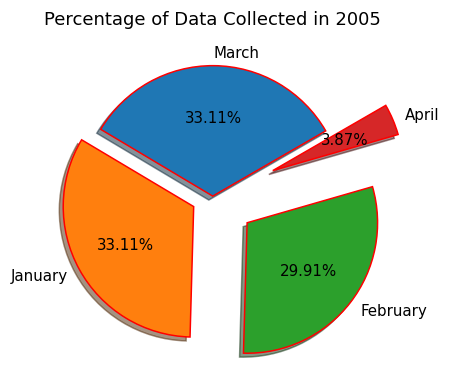

In [ ]:
# S1.8: Create a pie chart for the 2005 displaying all the months. Label the slices with the month names.
data = df.loc[df['Year'] == 2005, 'Month Name'].value_counts()
explode = np.linspace(0, 0.5, 4) # Shift the slices away from the centre of the pie 

plt.figure(dpi=108)
plt.title("Percentage of Data Collected in 2005")
plt.pie(data, labels=data.index, 
        explode=explode, autopct='%1.2f%%',
        startangle=30, # The first slice will be placed at an angle of 30 degrees w.r.t. to the horizontal axis in the anti-clockwise direction.
        shadow=True,
        wedgeprops={'edgecolor':'r'})

plt.show()

**Note:** The sum of all the percentages in a pie chart will be and should be 100.

**When not to create a pie chart?**

A pie chart has its limited use. It should be used to plot the proportion of a few categories. If there are more category proportions to be visualised then don't use the pie chart.

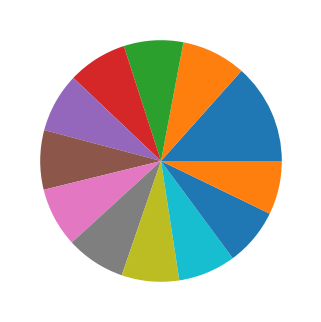

In [ ]:
# S1.9: Create a pie chart to visualise the proportions of the observations recorded in each month in the year 2004.
plt.figure(dpi=100)
plt.pie(df['Month'].value_counts())
plt.show()

As you can see there are too many, i.e., 12 proportions to be plotted in the above pie chart which is quite hard to interpret even if we label it.

---

#### Task 2: Bell Curve

Nature loves symmetry. How? Consider a small experiment in which you measure the heights of say 10,000 men (or women) in a city. There would be many individuals who would be equally tall. The height of most people will be equal to the mean (or average) height of all 10,000 people. Also, 50% of the population (or 5000 individuals) will have a height less than or equal to the mean height and the other 50% of the population (or 5000 individuals) will have a height greater than the mean height. So the distribution of heights will be symmetric around the mean of heights. Such a kind of distribution is called the **normal distribution**.

If you create a histogram to plot the heights of 10,000 individuals, the arrangement of the bars in the histogram will appear to form a bell shape. 

Let's create a histogram to understand this concept better. First, we will have to create a `numpy` array containing 10,000 numbers denoting the heights of 10,000 individuals in a city. Let their mean height be $165 \space cm$ and the standard deviation in heights be $15 \space cm$.

In [ ]:
# S2.1 Create a NumPy array containing 10,000 random normally distributed numbers having a mean of 165 cm and a standard deviation.
import numpy as np
height_mean = 165
height_std = 15
heights = np.random.normal(height_mean , height_std , 10000)
heights[:10]

array([143.89915541, 155.86864346, 152.29625293, 153.16926562,
       162.01875218, 142.71793864, 168.01369976, 145.02180366,
       180.61063172, 199.30432029])

The `np.random.normal()` function takes mean, standard deviation and size (number of numbers to be generated) as inputs and returns a numpy array containing normally distributed random numbers whose mean and standard deviation is very close to the provided mean and standard deviation values.

In [ ]:
# S2.2: Calculate the mean and standard deviation of the normally distributed heights.
print(np.mean(heights))
print(np.std(heights))


165.1538525659692
14.863269464029603


There would be a little error in the calculated mean and standard deviation after creating the array.

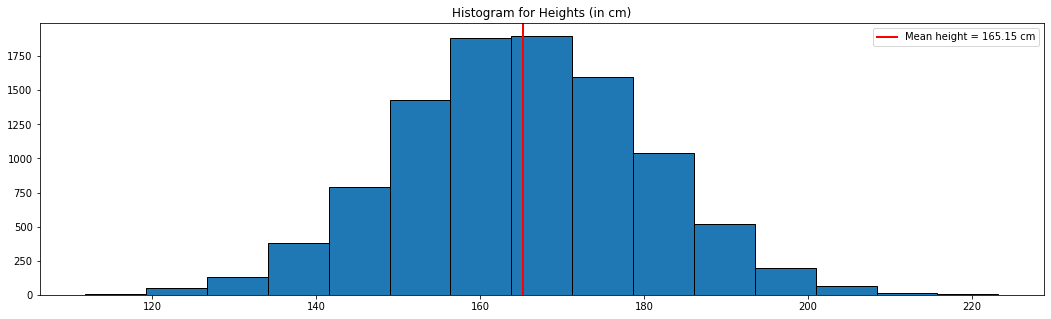

In [ ]:
# S2.3: Create a histogram for the heights.
plt.figure(figsize=(18,5))
plt.title('Histogram for Heights (in cm)')
plt.hist(heights, bins='sturges', edgecolor='black') # 'sturges' is one of the ways to compute the number of bins in a histogram.
plt.axvline(np.mean(heights), color='red', label=f'Mean height = {np.mean(heights):.2f} cm', linewidth=2) # Creates a vertical line 
plt.legend()
plt.show()

The `axvline()` function creates a vertical line intersecting with the $x-$axis at `x = np.mean(heights)`. 

In the above histogram, you can see that the arrangement of bars appears to make a bell shape. We can create a bell-shaped curve using the `distplot()` function.

**Note:** Here is the list of the number of bins determiners that you could use to get the near-perfect bell curve depending upon the number of data points.

`bin_num_determiners = ('fd', 'doane', 'scott', 'stone', 'rice', 'sturges', 'sqrt')`




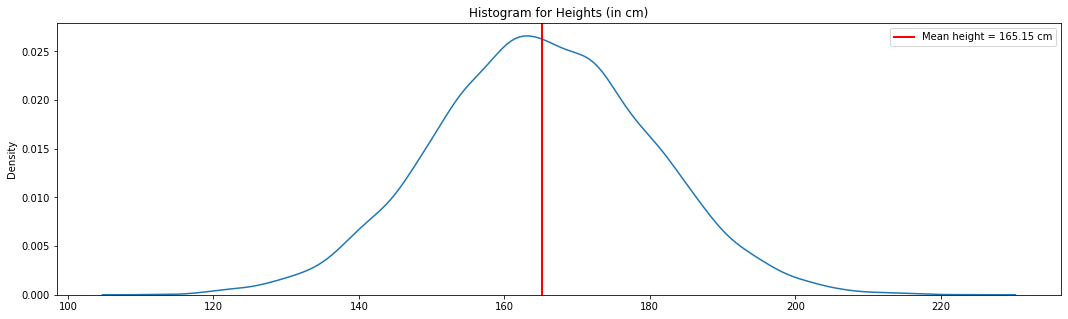

In [ ]:
# S2.4: Create a bell curve using the 'distplot()' function.
plt.figure(figsize=(18,5))
plt.title('Histogram for Heights (in cm)')
sns.distplot(heights, bins='sturges',hist=False) # 'sturges' is one of the ways to compute the number of bins in a histogram.
plt.axvline(np.mean(heights), color='red', label=f'Mean height = {np.mean(heights):.2f} cm', linewidth=2) # Creates a vertical line 
plt.legend()
plt.show()


**Note:** At this point, you don't need to know how the probability density values are computed because the knowledge of probability density function is required which you will learn in the subsequent classes. Right now, you just need to know how to interpret a bell curve.

The above graph is a bell curve created using the `distplot()` function in which the bars are disabled by passing the `False` value to the `hist` parameter. The `'sturges'` value passed to the `bins` parameter ensures that the bell curve created is equivalent to the histogram created earlier using the `hist()` function.

The great thing about the normally distributed values (or values in a bell-shaped curve) is that approximately

- $68 \%$ of the values lie between $\mu - \sigma$ and $\mu + \sigma$. In other words, approx. $68 \%$ of the values lie within **one-sigma** around the mean.

- $95 \%$ of the values lie between $\mu - 2 \sigma$ and $\mu + 2 \sigma$. In other words, approx. $95 \%$ of the values lie within **two-sigma** around the mean.

- $99.7 \%$ of the values lie between $\mu - 3 \sigma$ and $\mu + 3 \sigma$. In other words, approx. $99.7 \%$ of the values lie within **three-sigma** around the mean.

where $\mu$ and $\sigma$ are mean and standard deviation respectively.

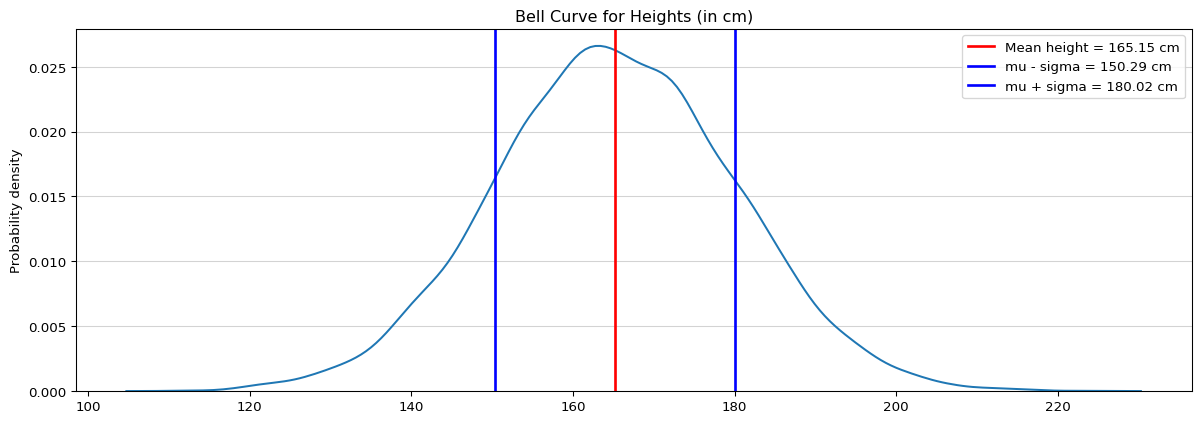

In [ ]:
# S2.5: Create a bell curve with the vertical lines denoting mean value and the one-sigma interval.
plt.figure(figsize=(15, 5), dpi=96)
plt.title("Bell Curve for Heights (in cm)")
sns.distplot(heights, hist=False, bins='sturges')
plt.axvline(np.mean(heights), color='red', label=f'Mean height = {np.mean(heights):.2f} cm', linewidth=2)

# One-sigma
plt.axvline(np.mean(heights) - np.std(heights), color='b', 
            label=f'mu - sigma = {np.mean(heights) - np.std(heights):.2f} cm', linewidth=2)
plt.axvline(np.mean(heights) + np.std(heights), color='b', 
            label=f'mu + sigma = {np.mean(heights) + np.std(heights):.2f} cm', linewidth=2)

plt.ylabel("Probability density")
plt.legend()
plt.grid(which='major', axis='y', color='lightgrey')
plt.show()

In [ ]:
# S2.6: Get the percentage of the values lying within one-sigma around the mean.
one_sigma_count = 0
for num in heights:
  if (num >= np.mean(heights) - np.std(heights)) and (num <= np.mean(heights) + np.std(heights)):
    one_sigma_count += 1

one_sigma_count * 100 / len(heights)

68.34

Another way to interpret the **one-sigma** interval is that about $68 \%$ of the total values in a dataset lie around its mean value. The remaining $32 \%$ of the total values lie away from the mean. This denotes that mean is indeed the central value.

Another interesting property of a bell curve (or normal distribution) is that the mean, median and mode values are the same.

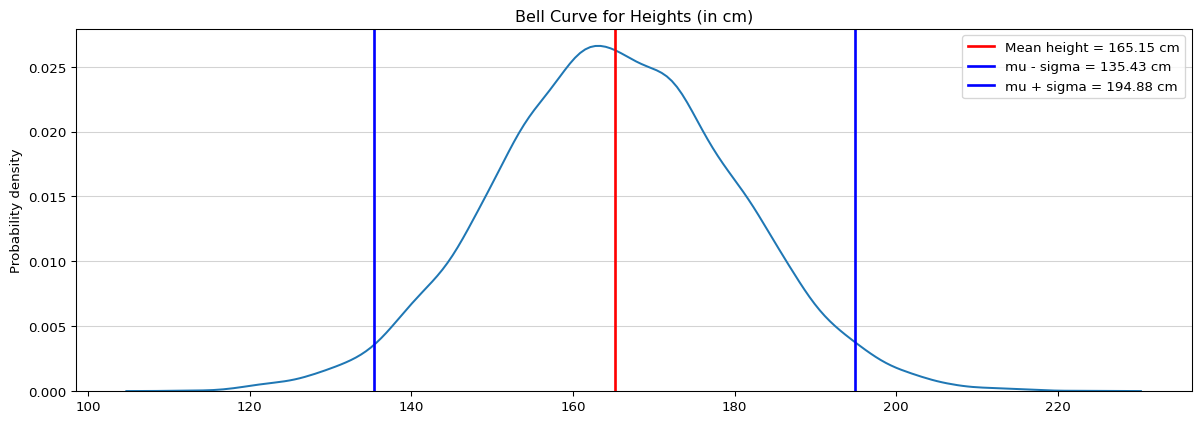

In [ ]:
# S2.7: Calculate the mean and the median height values.
plt.figure(figsize=(15, 5), dpi=96)
plt.title("Bell Curve for Heights (in cm)")
sns.distplot(heights, hist=False, bins='sturges')
plt.axvline(np.mean(heights), color='red', label=f'Mean height = {np.mean(heights):.2f} cm', linewidth=2)

# One-sigma
plt.axvline(np.mean(heights) - 2*np.std(heights), color='b', 
            label=f'mu - sigma = {np.mean(heights) - 2*np.std(heights):.2f} cm', linewidth=2)
plt.axvline(np.mean(heights) + 2*np.std(heights), color='b', 
            label=f'mu + sigma = {np.mean(heights) + 2*np.std(heights):.2f} cm', linewidth=2)

plt.ylabel("Probability density")
plt.legend()
plt.grid(which='major', axis='y', color='lightgrey')
plt.show()

From the histogram, it is very clear that the mean value has the greatest number of counts, so it is also the modal value or simply the mode.

The parameters **mean, median** and **mode** are called the measures of central tendency. In other words, what is the central value of all the observations in a dataset or if you were to represent all the observations in a dataset with exactly one central value, then what would be that value.

In [ ]:
# S2.8: Create a bell curve with the vertical lines denoting mean value and the two-sigma interval.
two_sigma_count = 0
for num in heights:
  if (num >= np.mean(heights) - 2*np.std(heights)) and (num <= np.mean(heights) + 2*np.std(heights)):
    two_sigma_count += 1

two_sigma_count * 100 / len(heights)

95.5

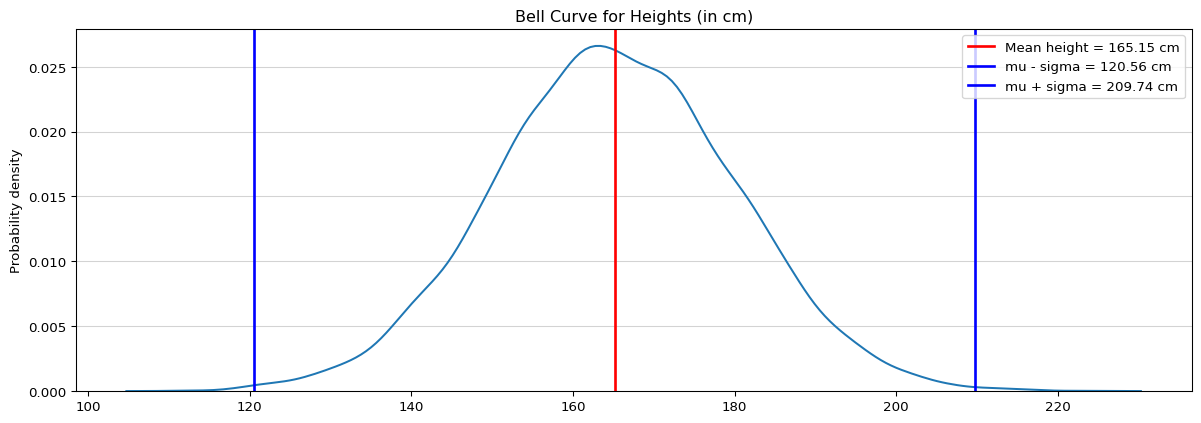

In [ ]:
# S2.9: Get the percentage of the values lying within two-sigma around the mean.
plt.figure(figsize=(15, 5), dpi=96)
plt.title("Bell Curve for Heights (in cm)")
sns.distplot(heights, hist=False, bins='sturges')
plt.axvline(np.mean(heights), color='red', label=f'Mean height = {np.mean(heights):.2f} cm', linewidth=2)

# One-sigma
plt.axvline(np.mean(heights) - 3*np.std(heights), color='b', 
            label=f'mu - sigma = {np.mean(heights) - 3*np.std(heights):.2f} cm', linewidth=2)
plt.axvline(np.mean(heights) + 3*np.std(heights), color='b', 
            label=f'mu + sigma = {np.mean(heights) + 3*np.std(heights):.2f} cm', linewidth=2)

plt.ylabel("Probability density")
plt.legend()
plt.grid(which='major', axis='y', color='lightgrey')
plt.show()

In [ ]:
# S2.10: Create a bell curve with the vertical lines denoting mean value and the three-sigma interval.
two_sigma_count = 0
for num in heights:
  if (num >= np.mean(heights) - 3*np.std(heights)) and (num <= np.mean(heights) + 3*np.std(heights)):
    two_sigma_count += 1

two_sigma_count * 100 / len(heights)

99.72

The point of normal distribution (or bell curve) is if a certain set of values follow normal distribution, then we can make the best guess with 

- $68 \%$ confidence, that the value lies between one-sigma

- $95 \%$ confidence, that the value lies between two-sigma

- $99 \%$ confidence, that the value lies between three-sigma

In [ ]:
np.median(heights) , np.mean(heights)

(165.03047944298567, 165.1538525659692)

---

#### Task 3: Applying Normal Distribution Concepts

Assuming that the relative humidity values in the `df` DataFrame follows the normal distribution, then with $68 \%$ confidence, you can say that a relative humidity of $45 \%$ will lie between the range $32.24 \%$ and $66.20 \%$

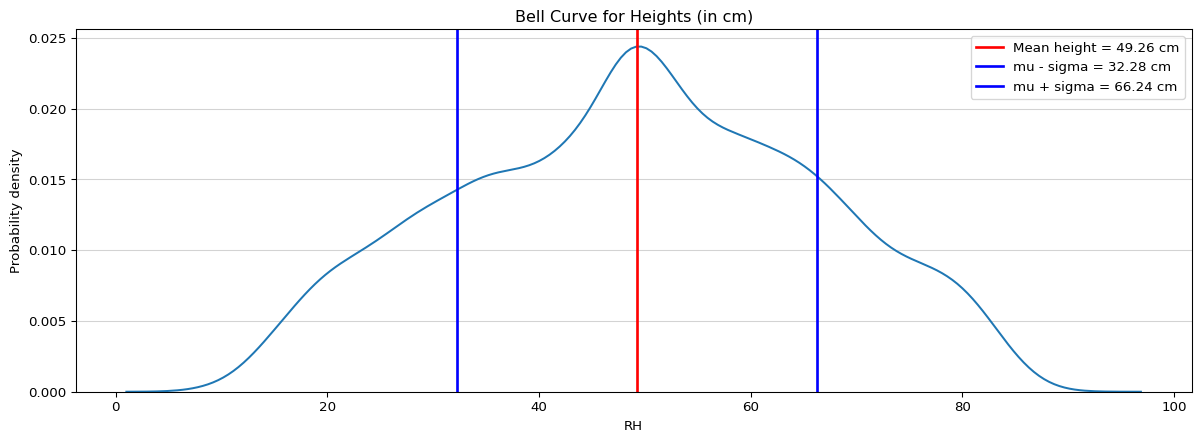

In [ ]:
# S3.1: Compute the one-sigma interval for the relative humidity values.

plt.figure(figsize=(15, 5), dpi=96)
plt.title("Bell Curve for Heights (in cm)")
sns.distplot(df["RH"], hist=False, bins='sturges')
plt.axvline(df["RH"].mean(), color='red', label=f'Mean height = {df["RH"].mean():.2f} cm', linewidth=2)

# One-sigma
plt.axvline(df["RH"].mean() - df["RH"].std(), color='b', 
            label=f'mu - sigma = {df["RH"].mean() - df["RH"].std():.2f} cm', linewidth=2)
plt.axvline(df["RH"].mean() + df["RH"].std(), color='b', 
            label=f'mu + sigma = {df["RH"].mean() + df["RH"].std():.2f} cm', linewidth=2)

plt.ylabel("Probability density")
plt.legend()
plt.grid(which='major', axis='y', color='lightgrey')
plt.show()

# S3.2: Create a histogram for relative humidity values and find out whether it follows a bell curve or not.


Also, the larger the standard deviation, the wider the bell curve. Lower the standard deviation, narrower the bell curve.

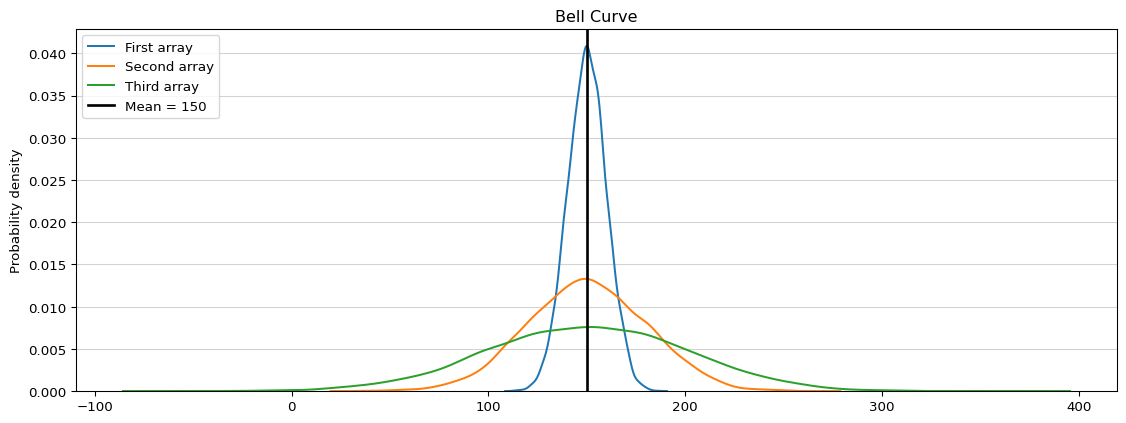

In [ ]:
# T3.1: Create 3 arrays having normally distributed random values. They should have the same length, same mean but different standard deviations.
mu = 150
array1 = np.random.normal(mu, 10, 10000) # First array having 10,000 values and std = 10
array2 = np.random.normal(mu, 30, 10000) # Second array having 10,000 values and std = 30
array3 = np.random.normal(mu, 50, 10000) # Third array having 10,000 values and std = 50

# T3.2: Create bell curves as well for above three arrays.
plt.figure(figsize=(14, 5), dpi=96)
plt.title("Bell Curve")
sns.distplot(array1, hist=False, bins='sturges', label='First array') # Bell curve for the first array
sns.distplot(array2, hist=False, bins='sturges', label='Second array') # Bell curve for the second array
sns.distplot(array3, hist=False, bins='sturges', label='Third array') # Bell curve for the third array
plt.axvline(mu, color='black', label=f'Mean = {mu}', linewidth=2)
plt.ylabel("Probability density")
plt.legend(loc='upper left') # 'loc' parameter sets the location of the legend to be displayed on the graph
plt.grid(which='major', axis='y', color='lightgrey')
plt.show()

In the above graph, the first array has the lowest standard deviation. Hence, its bell curve is the narrowest. The third array has the greatest standard deviation. Hence, its bell curve is the widest.

Evidently, the standard deviation value also affects the height of the bell curve.

Not just heights, a lot of physical quantities such as our weights, blood pressures, marks scored by students in an exam etc follow the bell curve (or normal distribution).

In the next class, we will learn to calculate the probability of an event.

---